##### In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Filter Items that have been observed for the first time in year 2022 or later.

In [3]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data["details"]["Date First Available"][-4:]) < 2022:
        filter = True

    return filter

In [4]:
with open("../data/meta_Electronics.jsonl", "r") as fp:
    with open(
        "../data/meta_Electronics_2022_2023.jsonl", "a", encoding="utf-8"
    ) as fp_out:
        with open(
            "../data/meta_Electronics_2022_2023_no_date.jsonl", "a", encoding="utf-8"
        ) as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write("\n")
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write("\n")
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

## Split the items into two categories: "has main category", "does not have main category"

In [5]:
def filter_category(data: dict) -> dict:
    filter = False
    if data["main_category"] == None:
        filter = True

    return filter

In [6]:
with open("../data/meta_Electronics_2022_2023.jsonl", "r") as fp:
    with open(
        "../data/meta_Electronics_2022_2023_with_category.jsonl", "a", encoding="utf-8"
    ) as fp_out:
        with open(
            "../data/meta_Electronics_2022_2023_no_category.jsonl",
            "a",
            encoding="utf-8",
        ) as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write("\n")
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write("\n")
                    fp_out_no_category.flush()

## Explore dsitribution by categories

In [7]:
df = pd.read_json("../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)

<Axes: xlabel='main_category'>

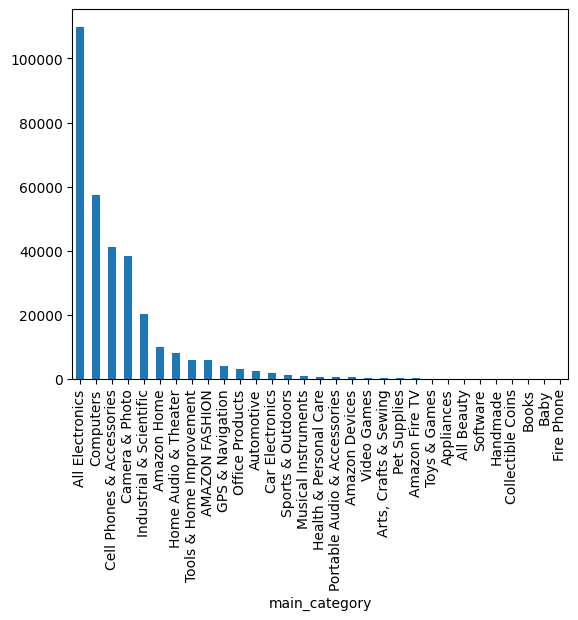

In [8]:
df["main_category"].value_counts().plot(kind="bar")

### Filter out items that have at least 100 ratings

In [9]:
df_ratings_100 = df[df["rating_number"] > 100]

## Explore distribution of ratings

<Axes: ylabel='Frequency'>

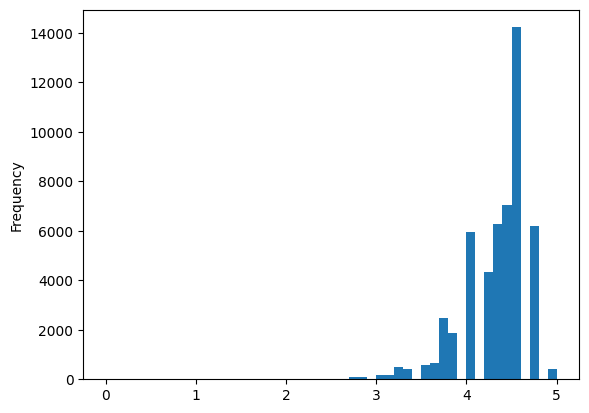

In [10]:
df_ratings_100["average_rating"].plot(kind="hist", bins=50, range=(0, 5))

#### Sample 1000 items

In [11]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

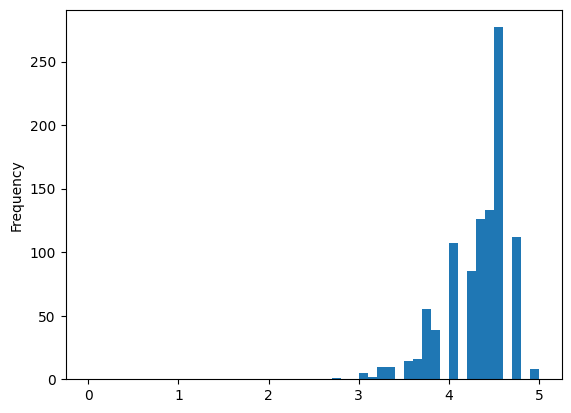

In [12]:
df_sample_1000["average_rating"].plot(kind="hist", bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

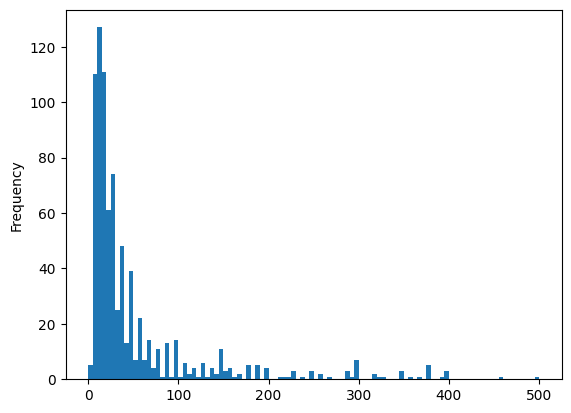

In [13]:
df_sample_1000["price"].plot(kind="hist", bins=100, range=(0, 500))

In [14]:
df_ratings_100.to_json(
    "../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl",
    orient="records",
    lines=True,
)

In [15]:
df_sample_1000.to_json(
    "../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl",
    orient="records",
    lines=True,
)

## Extract ratings that match sampled data.

In [16]:
df_ratings_100 = pd.read_json(
    "../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True
)
df_sample_1000 = pd.read_json(
    "../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl",
    lines=True,
)

In [17]:
with open("../data/Electronics.jsonl", "r") as fp:
    with open(
        "../data/Electornics_2022_2023_with_category_ratings_100.jsonl", "a"
    ) as fp_out:
        id_list = set(df_ratings_100["parent_asin"].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data["parent_asin"] in id_list:
                json.dump(data, fp_out)
                fp_out.write("\n")
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines
Processed 3500000 lines
Processed 3600000 lines
Processed 3700000 lines
Processed 3800000 lines
Processed 3900000 lines
Processed 4000000 lines
Processed 4100000 lines
Processed 4200000 lines
P

In [18]:
with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", "r") as fp:
    with open(
        "../data/Electornics_2022_2023_with_category_ratings_100_sample_1000.jsonl", "a"
    ) as fp_out:
        id_list = set(df_sample_1000["parent_asin"].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data["parent_asin"] in id_list:
                json.dump(data, fp_out)
                fp_out.write("\n")
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines


In [19]:
df_sample_1000.head()
# print(df_sample_1000.columns)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Electronics,2 Pack-iPhone Earbuds Wired Lightning Headphon...,3.4,598,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],WASABI MANGO,"[Electronics, Headphones, Earbuds & Accessorie...",{'Product Dimensions': '23.62 x 19.69 x 27.56 ...,B0B1ZVC7GJ,NaN,NaN,NaN
1,Computers,"Mini PC 16GB DDR4 256GB M.2 SSD,Quad-Core 2.7G...",4.3,450,[【Meet to Sufficient Memory Storage】This Mini ...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],OUVISLITE,"[Electronics, Computers & Accessories, Compute...","{'Screen Resolution': '3840 x 2160', 'Max Scre...",B0B1HNV2V9,NaN,NaN,NaN
2,Computers,Samsers Foldable Bluetooth Keyboard with Touch...,4.4,308,[【Full-size Folding Wireless Keyboard】 Samsers...,[],48.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Love this keyboard!', 'url': 'http...",Samsers,"[Electronics, Computers & Accessories, Compute...",{'Product Dimensions': '13.5 x 4.5 x 0.4 inche...,B0C2Q8BDTX,NaN,NaN,NaN
3,Computers,"Rolling Laptop Bag Women with Wheels, Rolling ...",4.5,152,[MOBILE OFFICE: EMPSIGN rolling bag with lapto...,[rolling laptop bag],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Elegant Laptop Tote Bag for Women ...,Ytonet,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Ytonet', 'Item model number': '1332...",B092Z9CTNK,NaN,NaN,NaN
4,All Electronics,"Wireless Mouse, 2.4G Silent Mouse with USB Rec...",4.6,677,[Plug & Play Super Easy to Use- Just plug and ...,[],10.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],MagoFeliz,"[Electronics, Computers & Accessories, Compute...",{'Product Dimensions': '4.69 x 2.6 x 0.01 inch...,B0C77L1G7V,NaN,NaN,NaN


In [20]:
df_ratings_100.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,[【 COMPATIBLE WITH 】 Designed to Fits Perfectl...,[May Chen High Quality Plastic Hard Shell Case...,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'MOSISO Plastic Hard Shell Compati...,May Chen,"[Electronics, Computers & Accessories, Laptop ...","{'Standing screen display size': '16 Inches', ...",B0822SL7JX,NaN,NaN,NaN
1,Amazon Home,"Nurse Stickers for Water Bottles and Laptop, N...",4.6,123,[],[],8.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Nursing stickers that are waterpro...,ABAMERICA,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'ABAMERICA', 'Color': 'C3- Medium & ...",B0B1BXC6W1,NaN,NaN,NaN
2,Cell Phones & Accessories,CoBak Case for Kindle Paperwhite - All New PU ...,4.8,1064,"[Fit: Perfect cutout and shape, specially desi...",[],18.95,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'kindle paperwhite case', 'url': 'h...",CoBak,"[Electronics, eBook Readers & Accessories, Cov...",{'Package Dimensions': '7.09 x 5.12 x 0.67 inc...,B0C5XLH1HM,NaN,NaN,NaN
3,Camera & Photo,8x8ft Pink Rose Flower Theme Photography Backd...,4.5,358,"[ʚɞSize：8x8FT 2.4 m wide by 2.4 m tall,Item se...",[Details 1. The item color as the picture show...,38.90,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Avezano Brand Video', 'url': 'http...",XLL,"[Electronics, Camera & Photo, Lighting & Studi...",{'Package Dimensions': '10.94 x 9.57 x 1.97 in...,B08XQ8PS2J,NaN,NaN,NaN
4,Cell Phones & Accessories,"Aiminu USB C to Lightning Cable 6ft 2Pack, Fas...",4.5,5763,[【Universal Compatibility】Aiminu USB-C to ligh...,[],10.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Great charging cord! Threading mak...,Aiminu,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'Aiminu', 'Connector Type': 'USB Typ...",B0B7WT4RZK,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## 1. Distribution of Ratings Analysis

In [21]:
# Load the data (using the filtered dataset with 100+ ratings)
df_analysis = df_ratings_100.copy()

# Basic statistics for ratings
print("Rating Statistics:")
print(f"Mean Rating: {df_analysis['average_rating'].mean():.2f}")
print(f"Median Rating: {df_analysis['average_rating'].median():.2f}")
print(f"Std Dev: {df_analysis['average_rating'].std():.2f}")
print(f"Min Rating: {df_analysis['average_rating'].min():.2f}")
print(f"Max Rating: {df_analysis['average_rating'].max():.2f}")

Rating Statistics:
Mean Rating: 4.31
Median Rating: 4.40
Std Dev: 0.35
Min Rating: 1.90
Max Rating: 5.00


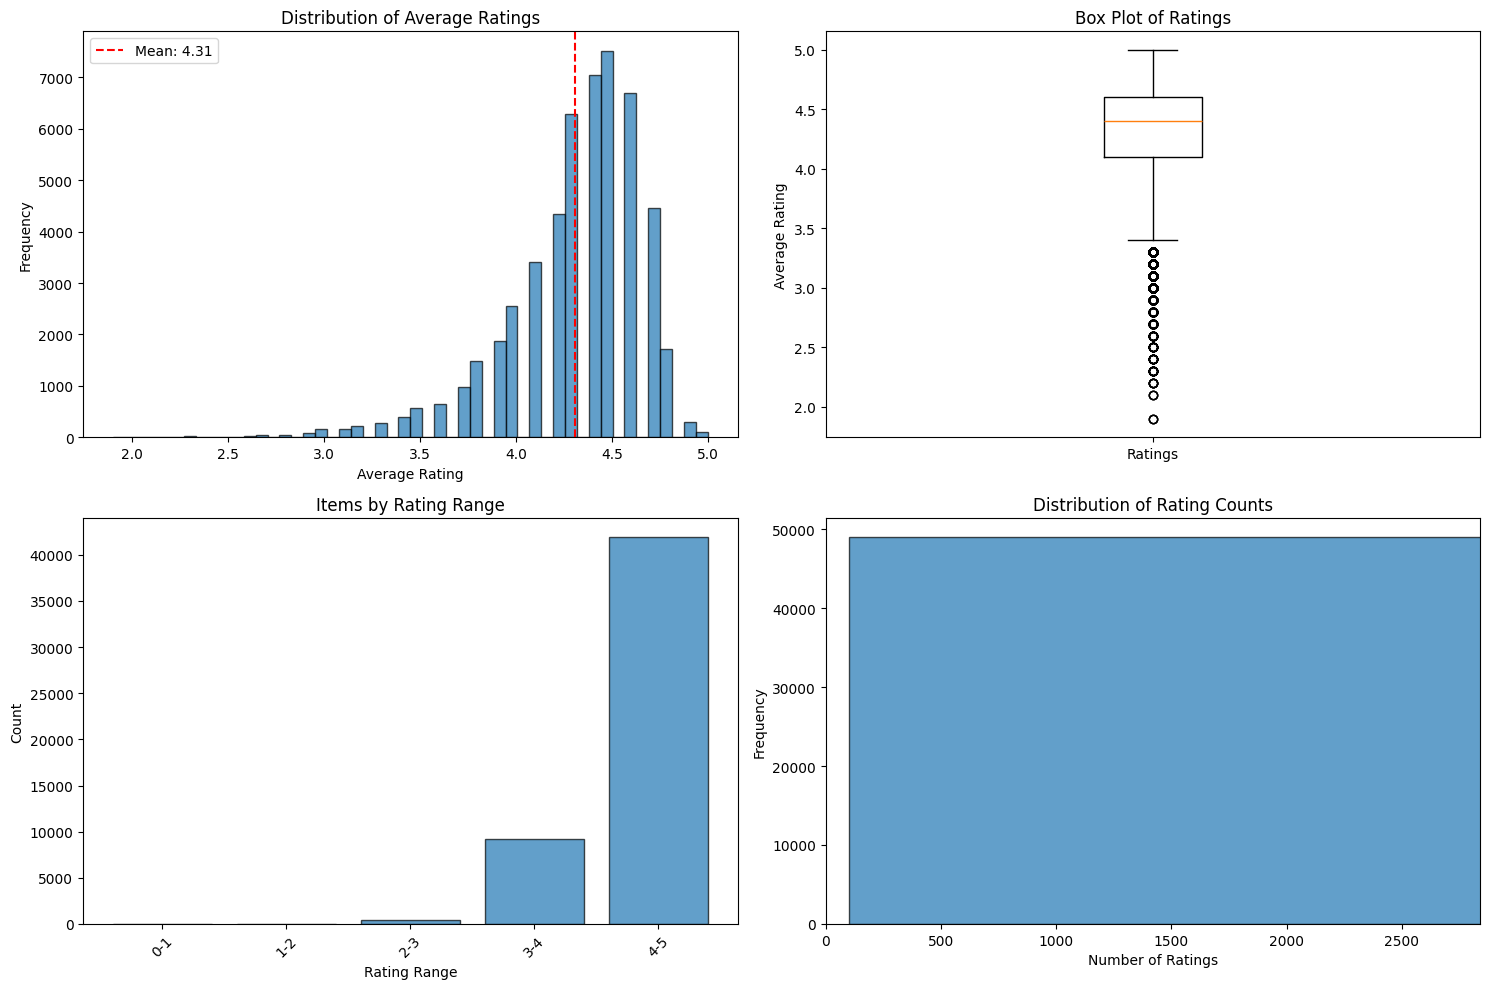


Rating Range Distribution:
average_rating
0-1        0
1-2        3
2-3      420
3-4     9156
4-5    41907
Name: count, dtype: int64


In [22]:
# Detailed rating distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of ratings
axes[0, 0].hist(df_analysis["average_rating"], bins=50, edgecolor="black", alpha=0.7)
axes[0, 0].set_xlabel("Average Rating")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Distribution of Average Ratings")
axes[0, 0].axvline(
    df_analysis["average_rating"].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {df_analysis['average_rating'].mean():.2f}",
)
axes[0, 0].legend()

# Box plot of ratings
axes[0, 1].boxplot(df_analysis["average_rating"].dropna())
axes[0, 1].set_ylabel("Average Rating")
axes[0, 1].set_title("Box Plot of Ratings")
axes[0, 1].set_xticklabels(["Ratings"])

# Rating distribution by bins
rating_bins = pd.cut(
    df_analysis["average_rating"],
    bins=[0, 1, 2, 3, 4, 5],
    labels=["0-1", "1-2", "2-3", "3-4", "4-5"],
)
rating_counts = rating_bins.value_counts().sort_index()
axes[1, 0].bar(rating_counts.index, rating_counts.values, edgecolor="black", alpha=0.7)
axes[1, 0].set_xlabel("Rating Range")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Items by Rating Range")
axes[1, 0].tick_params(axis="x", rotation=45)

# Number of ratings distribution
axes[1, 1].hist(df_analysis["rating_number"], bins=50, edgecolor="black", alpha=0.7)
axes[1, 1].set_xlabel("Number of Ratings")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Distribution of Rating Counts")
axes[1, 1].set_xlim(0, df_analysis["rating_number"].quantile(0.95))

plt.tight_layout()
plt.show()

print("\nRating Range Distribution:")
print(rating_counts)

### Rating Distribution Insights

**Positivity Bias:**
- 82% of products rated 4-5 stars
- Mean rating of 4.31 indicates high customer satisfaction
- Low-rated products are rare (likely removed from marketplace)

**Data Quality:**
- Tight IQR (4.0-4.6) shows consistency
- Outliers below 3.5 stars are exceptions, not the norm
- Dataset represents successful products that survived market filtering

**Implications:**
- Ratings above 4.3 are "average" in this marketplace
- Products below 4.0 are significantly underperforming
- Small rating differences (e.g., 4.3 vs 4.5) may be more meaningful than they appear
- Rating inflation means customers likely focus on reviews, not just star counts

**Statistical Considerations:**
- Left-skewed distribution violates normality assumptions
- Mean < Median confirms negative skew
- Standard statistical tests may need adjustment
- Consider using median and IQR for comparisons instead of mean and SD

In [24]:
## 2. Price and Rating Correlation Analysis
# Filter out items with valid price data
df_with_price = df_analysis[
    df_analysis["price"].notna() & (df_analysis["price"] > 0)
].copy()

print(f"Items with valid price data: {len(df_with_price)}/{len(df_analysis)}")
print("\nPrice Statistics:")
print(f"Mean Price: ${df_with_price['price'].mean():.2f}")
print(f"Median Price: ${df_with_price['price'].median():.2f}")
print(f"Std Dev: ${df_with_price['price'].std():.2f}")
print(f"Min Price: ${df_with_price['price'].min():.2f}")
print(f"Max Price: ${df_with_price['price'].max():.2f}")

# Calculate correlation
correlation = df_with_price["price"].corr(df_with_price["average_rating"])
print(f"\nCorrelation between Price and Rating: {correlation:.4f}")

Items with valid price data: 42027/51486

Price Statistics:
Mean Price: $73.10
Median Price: $24.99
Std Dev: $280.45
Min Price: $0.39
Max Price: $24996.99

Correlation between Price and Rating: -0.0064


/var/folders/7d/0kh1mw2n62x6t5x8lp0hgjt80000gp/T/ipykernel_42985/2153101310.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_price = df_plot.groupby(price_bins)['average_rating'].mean()
/var/folders/7d/0kh1mw2n62x6t5x8lp0hgjt80000gp/T/ipykernel_42985/2153101310.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['price_quartile'] = pd.qcut(df_plot['price'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])


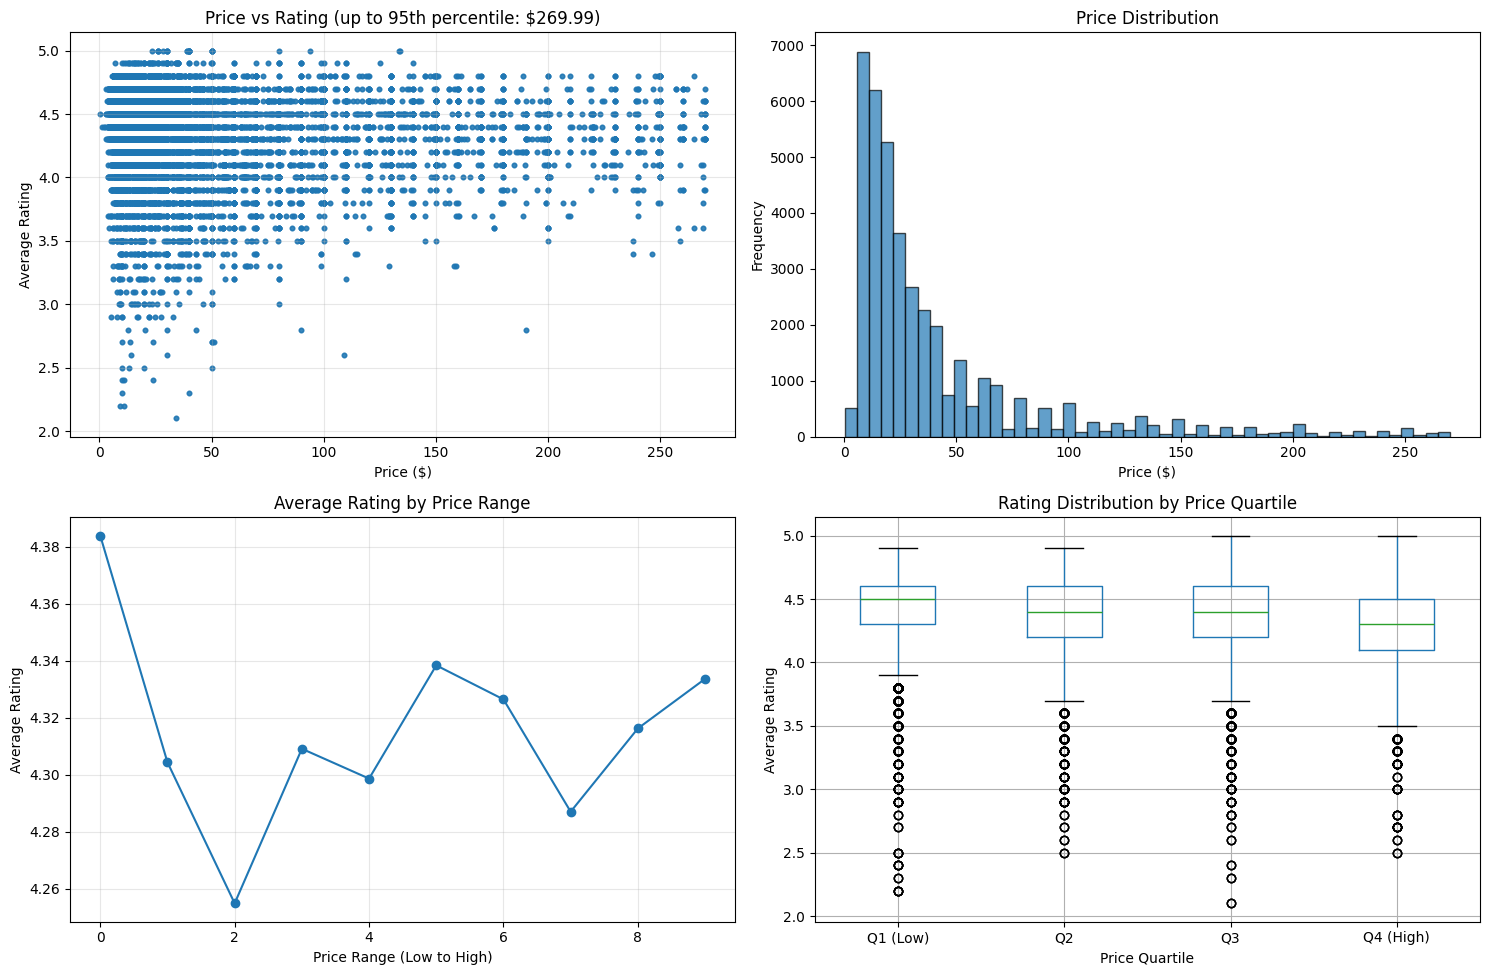

In [25]:
# Visualize price vs rating relationship
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot with limited price range for better visualization
price_limit = df_with_price["price"].quantile(0.95)
df_plot = df_with_price[df_with_price["price"] <= price_limit]

axes[0, 0].scatter(df_plot["price"], df_plot["average_rating"], alpha=0.5, s=10)
axes[0, 0].set_xlabel("Price ($)")
axes[0, 0].set_ylabel("Average Rating")
axes[0, 0].set_title(f"Price vs Rating (up to 95th percentile: ${price_limit:.2f})")
axes[0, 0].grid(True, alpha=0.3)

# Price distribution
axes[0, 1].hist(df_plot["price"], bins=50, edgecolor="black", alpha=0.7)
axes[0, 1].set_xlabel("Price ($)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Price Distribution")

# Average rating by price bins
price_bins = pd.cut(df_plot["price"], bins=10)
rating_by_price = df_plot.groupby(price_bins)["average_rating"].mean()
axes[1, 0].plot(range(len(rating_by_price)), rating_by_price.values, marker="o")
axes[1, 0].set_xlabel("Price Range (Low to High)")
axes[1, 0].set_ylabel("Average Rating")
axes[1, 0].set_title("Average Rating by Price Range")
axes[1, 0].grid(True, alpha=0.3)

# Box plot of ratings by price quartiles
df_plot["price_quartile"] = pd.qcut(
    df_plot["price"], q=4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"]
)
df_plot.boxplot(column="average_rating", by="price_quartile", ax=axes[1, 1])
axes[1, 1].set_xlabel("Price Quartile")
axes[1, 1].set_ylabel("Average Rating")
axes[1, 1].set_title("Rating Distribution by Price Quartile")
plt.suptitle("")

plt.tight_layout()
plt.show()

## Price vs Rating Analysis Results

### Key Findings from Visualizations

**1. Price vs Rating Scatter Plot (Top-Left)**
- Most products cluster in the 4-5 star range across all price points
- Heavy concentration of products in lower price ranges ($0-$50)
- Ratings remain consistently high regardless of price

**2. Price Distribution (Top-Right)**
- Heavily right-skewed distribution
- Majority of electronics priced under $50
- Frequency drops sharply as price increases
- Long tail of higher-priced items

**3. Average Rating by Price Range (Bottom-Left)**
- U-shaped pattern observed
- Lowest priced items: Higher average ratings (~4.38)
- Mid-range prices: Slight dip in ratings (~4.26)
- Higher prices: Ratings recover slightly (~4.33)

**4. Rating Distribution by Price Quartile (Bottom-Right)**
- All quartiles show similar median ratings (~4.3-4.4)
- Consistent rating patterns across all price ranges
- Higher-priced items show slightly more variability (more outliers)
- Many low-rated outliers exist across all price quartiles

### Conclusion
**Weak correlation between price and rating** - expensive electronics products are not necessarily rated better than cheaper ones. Price does not appear to be a strong predictor of customer satisfaction in the electronics category.

In [26]:
## 3. Popular Items and Categories Based on Review Counts
# Top 20 most reviewed items
top_items = df_analysis.nlargest(20, "rating_number")[
    ["title", "rating_number", "average_rating", "main_category", "price"]
]
print("Top 20 Most Reviewed Items:")
print("=" * 100)
for idx, (i, row) in enumerate(top_items.iterrows(), 1):
    print(f"\n{idx}. {row['title'][:80]}")
    print(f"   Category: {row['main_category']}")
    print(
        f"   Reviews: {row['rating_number']:,} | Rating: {row['average_rating']:.2f} | Price: ${row['price']:.2f}"
        if pd.notna(row["price"])
        else f"   Reviews: {row['rating_number']:,} | Rating: {row['average_rating']:.2f} | Price: N/A"
    )

Top 20 Most Reviewed Items:

1. Syntech USB C to USB Adapter Pack of 2 USB C Male to USB3 Female Adapter Compati
   Category: Computers
   Reviews: 140,739 | Rating: 4.60 | Price: $13.99

2. Syntech USB C to USB Adapter Pack of 2 USB C Male to USB3 Female Adapter Compati
   Category: Computers
   Reviews: 140,739 | Rating: 4.60 | Price: $13.99

3. Syntech USB C to USB Adapter Pack of 2 USB C Male to USB3 Female Adapter Compati
   Category: Computers
   Reviews: 140,739 | Rating: 4.60 | Price: $13.99

4. SanDisk 64GB 2-Pack Ultra microSDXC UHS-I Memory Card (2x64GB) with Adapter - SD
   Category: Computers
   Reviews: 121,509 | Rating: 4.70 | Price: $16.99

5. SanDisk 64GB 2-Pack Ultra microSDXC UHS-I Memory Card (2x64GB) with Adapter - SD
   Category: Computers
   Reviews: 121,509 | Rating: 4.70 | Price: $16.99

6. SanDisk 64GB 2-Pack Ultra microSDXC UHS-I Memory Card (2x64GB) with Adapter - SD
   Category: Computers
   Reviews: 121,509 | Rating: 4.70 | Price: $16.99

7. OnePlus Bullet

In [27]:
# Category analysis by review counts
category_stats = (
    df_analysis.groupby("main_category")
    .agg({"rating_number": ["sum", "mean", "count"], "average_rating": "mean"})
    .round(2)
)

category_stats.columns = [
    "Total Reviews",
    "Avg Reviews per Item",
    "Number of Items",
    "Avg Rating",
]
category_stats = category_stats.sort_values("Total Reviews", ascending=False)

print("\nCategory Statistics (sorted by total review count):")
print("=" * 100)
print(category_stats)

# Top 10 categories by total reviews
print("\n\nTop 10 Most Popular Categories by Total Review Count:")
print(category_stats.head(10))


Category Statistics (sorted by total review count):
                              Total Reviews  Avg Reviews per Item  \
main_category                                                       
All Electronics                    18817428                895.94   
Computers                           9106788               1049.29   
Cell Phones & Accessories           5925540                724.57   
Camera & Photo                      2953755                646.90   
Industrial & Scientific             2084748                651.28   
Home Audio & Theater                1198653               1059.82   
AMAZON FASHION                       468750                482.25   
Tools & Home Improvement             445593                624.08   
Office Products                      429189                630.23   
Amazon Home                          405900                325.24   
Amazon Devices                       204396               1419.42   
Sports & Outdoors                    187323       

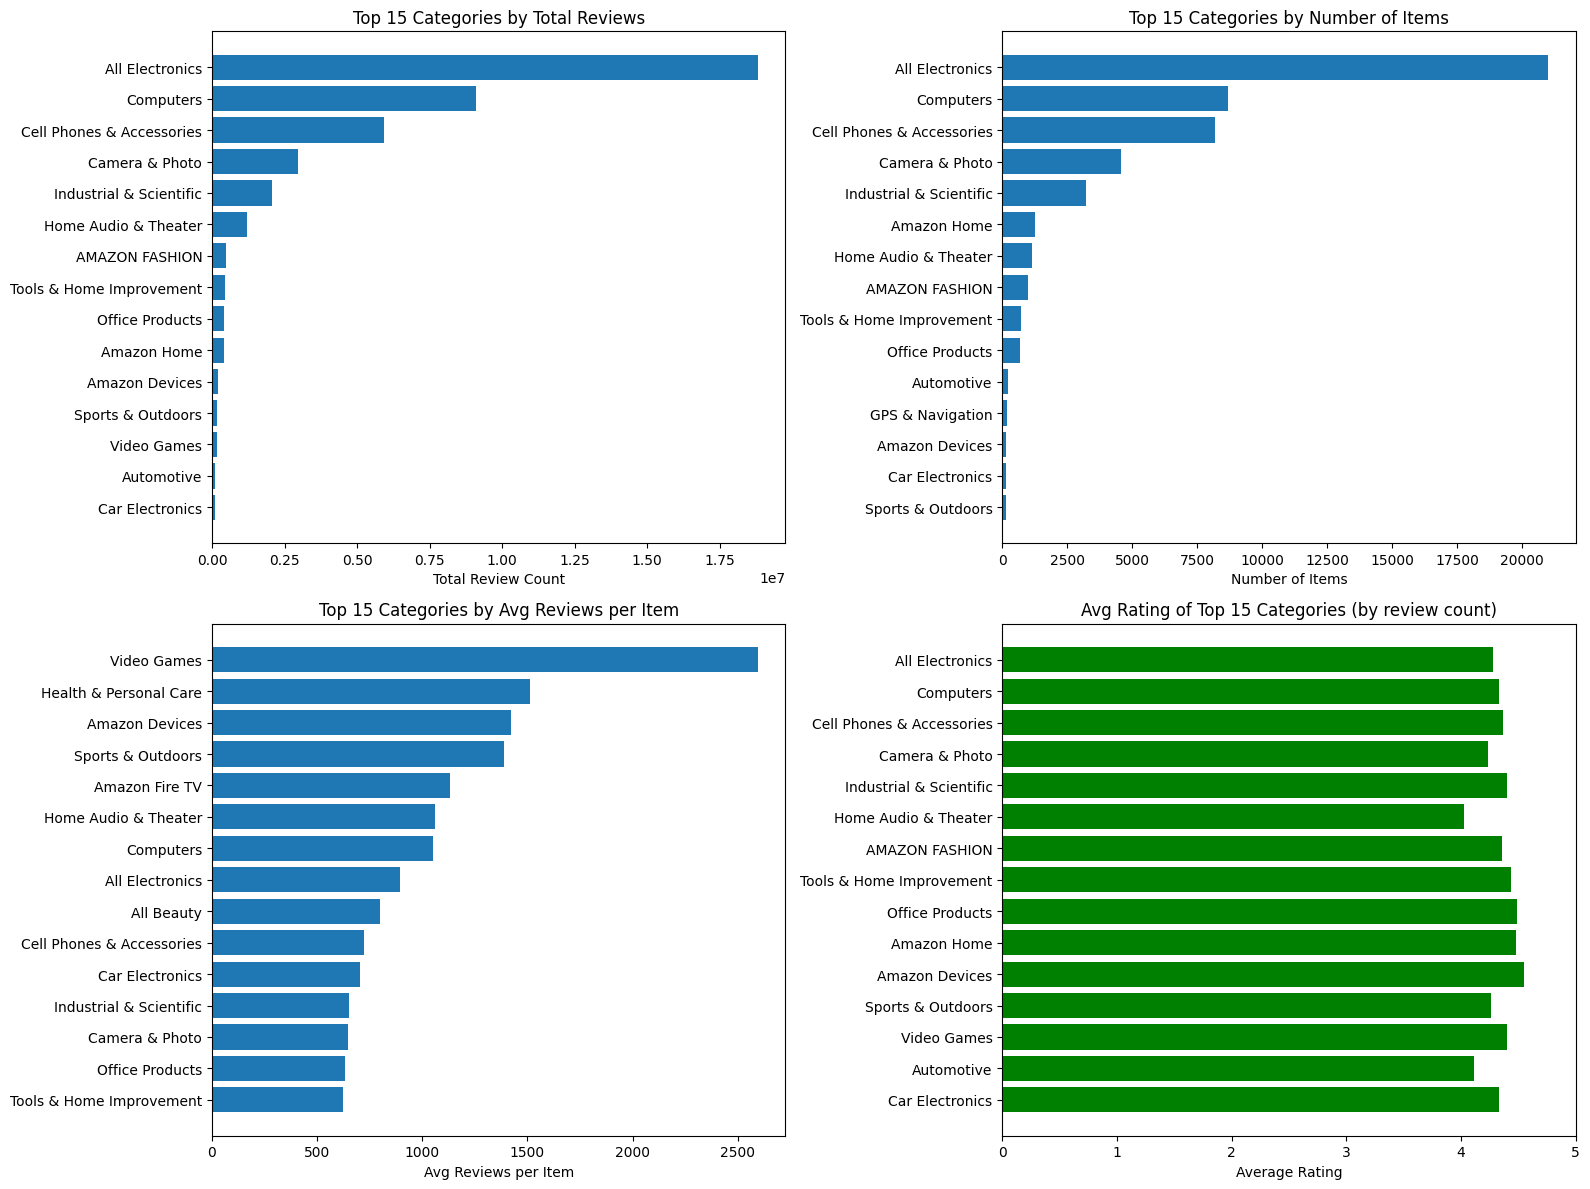

In [28]:
# Visualize popular categories
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 categories by total reviews
top_categories = category_stats.head(15)
axes[0, 0].barh(range(len(top_categories)), top_categories["Total Reviews"])
axes[0, 0].set_yticks(range(len(top_categories)))
axes[0, 0].set_yticklabels(top_categories.index)
axes[0, 0].set_xlabel("Total Review Count")
axes[0, 0].set_title("Top 15 Categories by Total Reviews")
axes[0, 0].invert_yaxis()

# Top 15 categories by number of items
top_items_cat = category_stats.nlargest(15, "Number of Items")
axes[0, 1].barh(range(len(top_items_cat)), top_items_cat["Number of Items"])
axes[0, 1].set_yticks(range(len(top_items_cat)))
axes[0, 1].set_yticklabels(top_items_cat.index)
axes[0, 1].set_xlabel("Number of Items")
axes[0, 1].set_title("Top 15 Categories by Number of Items")
axes[0, 1].invert_yaxis()

# Average reviews per item by category (top 15)
top_avg_reviews = category_stats.nlargest(15, "Avg Reviews per Item")
axes[1, 0].barh(range(len(top_avg_reviews)), top_avg_reviews["Avg Reviews per Item"])
axes[1, 0].set_yticks(range(len(top_avg_reviews)))
axes[1, 0].set_yticklabels(top_avg_reviews.index)
axes[1, 0].set_xlabel("Avg Reviews per Item")
axes[1, 0].set_title("Top 15 Categories by Avg Reviews per Item")
axes[1, 0].invert_yaxis()

# Average rating by category (top 15 by total reviews)
axes[1, 1].barh(range(len(top_categories)), top_categories["Avg Rating"], color="green")
axes[1, 1].set_yticks(range(len(top_categories)))
axes[1, 1].set_yticklabels(top_categories.index)
axes[1, 1].set_xlabel("Average Rating")
axes[1, 1].set_title("Avg Rating of Top 15 Categories (by review count)")
axes[1, 1].set_xlim(0, 5)
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

### Category Insights Summary

**Most Popular Categories (by total engagement):**
1. All Electronics
2. Computers  
3. Cell Phones & Accessories

**Highest Engagement per Item:**
1. Video Games (~2,500 reviews/item)
2. Health & Personal Care (~1,800 reviews/item)
3. Amazon Devices (~1,600 reviews/item)

**Quality Consistency:**
- All major categories maintain high ratings (4.0-4.5 stars)
- Category choice has minimal impact on expected product quality
- Customer satisfaction is uniformly high across electronics categories

**Strategic Implications:**
- Video Games and Health & Personal Care show highest customer engagement despite smaller inventory
- Broader categories (All Electronics, Computers) dominate by volume but have lower engagement per product
- High baseline ratings suggest review inflation or selection bias (only successful products survive)